<a href="https://colab.research.google.com/github/safarie1103/dsc650/blob/master/ExternalResources/Real_Time_Big_Data_Streaming_Spark_Kafka-main/flight_kafka_consumer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=blue> Real Time Flight Data Streaming - Kafka Consumer </font>


In [5]:
!pip install kafka-python


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Consuming data the data being streamed using Kafka and plotting it.

In [6]:
# import statements
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from json import loads

## Step 1

#### Set topic, connect consumer to producer and set plotting function

In [13]:
# set the topic of the consumer
topic = 'flightTopic'

# function to connect to kafka consumer
# taken from tutorial week 9
def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=10000, # stop iteration if no message after 10 sec
                                   auto_offset_reset='latest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['192.168.86.48:9092'],
                                   value_deserializer=lambda x: loads(x.decode('ascii')),
                                   api_version=(0, 11,5))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

    
# function to set up the plotting area
# taken from tutorial week 9
def init_plots():
    try:
        width = 9.5
        height = 10
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        #fig.suptitle('Number of flights every 30 secs by keyFlight') # giving figure a title
        #ax.set_xlabel('timestamp')
        #ax.set_ylabel('countFlightRecords')        
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))

## Step 2

#### Process the data into the desired batch format and plot it

In [11]:
# NEW
# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

    
# function to consume and display the data sent by the prodcuer
# partially taken from tutorial week 9
def countFlightRecords(consumer, fig, ax):
    try:
        
        ## 1. GENERATE THE DATA CONTAINERS
        
        time_start = 0
        
        count_of_flights = {1:0, 2:0, 3:0}
        
        two_min_flight_data = []
        
        data_plot = False 
        
        
        ## 2. PLOTING DATA CONATINERS
        
        # container for x and y values
        y1, y2, y3, x1, x2, x3 = [], [], [], [], [], []
        
        # print the start of the process
        print('Processing records ...')
        
        
        for message in consumer:   

            # in case of the first batch 
            if time_start == 0:
                
                # save the timestamp of a batch
                ts_of_batch = message.value[0]['ts']
                
                # set new ts starting point
                time_start = ts_of_batch
            
            # for any further batches
            else:
                
                # save the timestamp of a batch
                ts_of_batch = message.value[0]['ts']
                
                # if condition when two minutes have passed
                if ts_of_batch - time_start > 60:
                    
                    # set binary switch
                    data_plot = True
                    
                    print('number of flights for keyFlight = ‘1’ : ', count_of_flights[1])
                    print('number of flights for keyFlight = ‘2’ : ', count_of_flights[2])
                    print('number of flights for keyFlight = ‘3’ : ', count_of_flights[3])
                    print('-----------------------')
                    
                    # dict to save the flight countof two minutes
                    two_min_tup = () 
                    
                    # append count for each of the three keyFlights
                    two_min_tup = (ts_of_batch, count_of_flights[1], count_of_flights[2], count_of_flights[3])
                    
                    # append the dict 
                    two_min_flight_data.append(two_min_tup)
                    
                    # append the data for our plotting input
                    x1.append(ts_of_batch)
                    x2.append(ts_of_batch)
                    x3.append(ts_of_batch)
                    y1.append(count_of_flights[1])
                    y2.append(count_of_flights[2])
                    y3.append(count_of_flights[3])
                    
                    # reset the counter for eah keyFlight
                    count_of_flights[1] = 0
                    count_of_flights[2] = 0
                    count_of_flights[3] = 0

                    # set the new 'last' timestamp
                    time_start = ts_of_batch

            
            # save the list of flights received at each iteration
            data_batch_list = message.value
            
            # loop through all the lights in the list 
            for i in range(0,len(data_batch_list)):
                
                # each entry in the list is a dict containing a flight
                flight_dict = data_batch_list[i]
                
                
                if flight_dict['DAY_OF_WEEK'] == '1':
                    
                    count_of_flights[1] += 1
                    
                
                elif flight_dict['DAY_OF_WEEK'] == '2':
                    
                    count_of_flights[2] += 1
                    
                elif flight_dict['DAY_OF_WEEK'] == '3':
                    
                    count_of_flights[3] += 1
                
            
            ## 3. PLOT THE DATA
            
            # start plotting if there are three or more 2 min flight count totals
            # and if variable data_plot is True
            if len(two_min_flight_data) >= 3 and data_plot is True:
                
                
                # visualize and update the graph
                ax.clear()
                ax.plot(x1, y1, label = 'keyFlight = ‘1’')
                ax.plot(x2, y2, label = 'keyFlight = ‘2’')
                ax.plot(x3, y3, label = 'keyFlight = ‘3’')

                ax.set_xlabel('timestamp----')
                ax.set_ylabel('countFlightRecords----')
                plt.legend()
                fig.canvas.draw()
                
                # set binary switch
                data_plot = False
                
                # removing the item in the first position
                x1.pop(0)
                x2.pop(0)
                x3.pop(0)
                y1.pop(0)
                y2.pop(0)
                y3.pop(0)
            
            
        plt.close('all')
        
    except Exception as ex:
        print(str(ex))
    
    
    

<IPython.core.display.Javascript object>


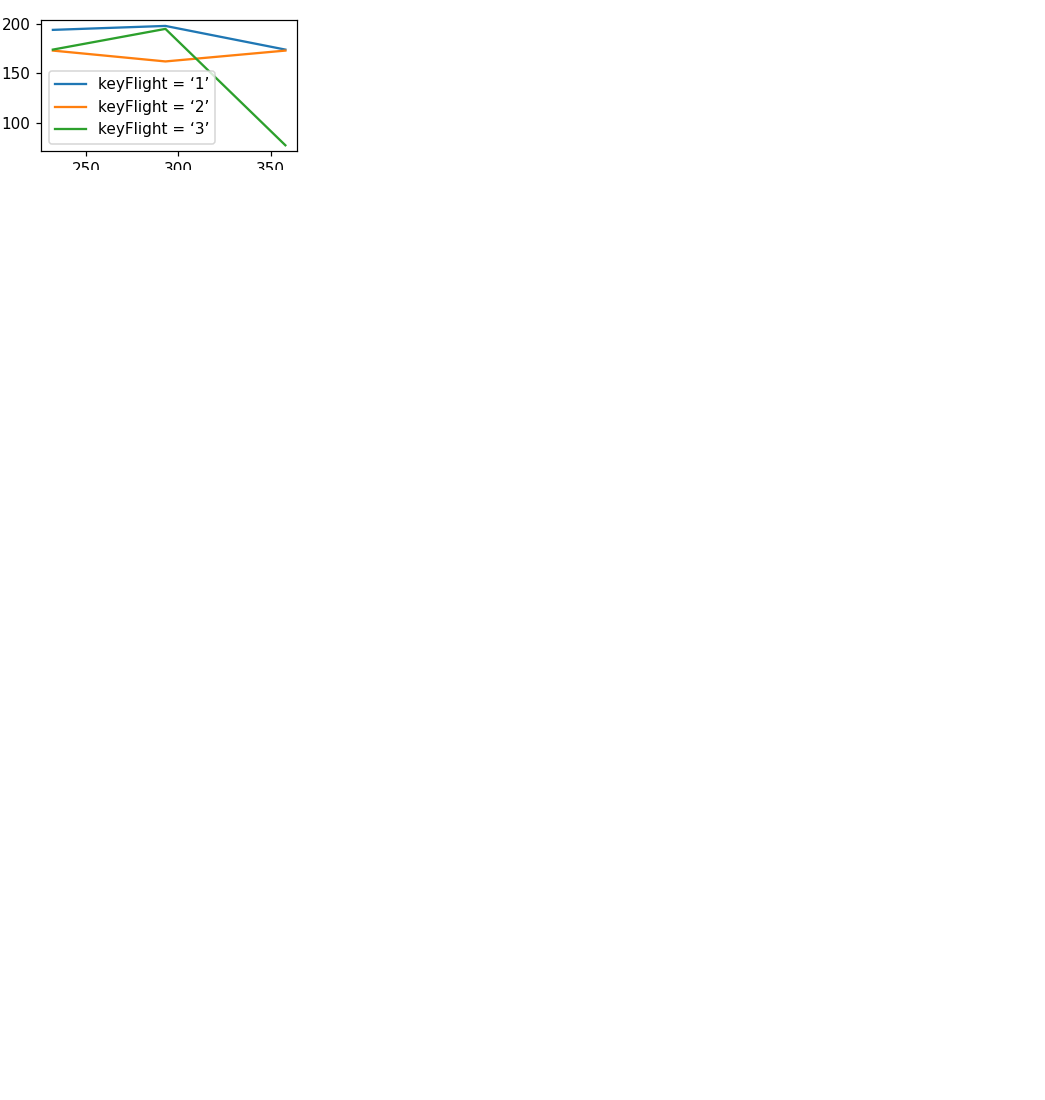

Processing records ...
number of flights for keyFlight = ‘1’ :  175
number of flights for keyFlight = ‘2’ :  165
number of flights for keyFlight = ‘3’ :  167
-----------------------
number of flights for keyFlight = ‘1’ :  196
number of flights for keyFlight = ‘2’ :  183
number of flights for keyFlight = ‘3’ :  83
-----------------------
number of flights for keyFlight = ‘1’ :  185
number of flights for keyFlight = ‘2’ :  97
number of flights for keyFlight = ‘3’ :  179
-----------------------
number of flights for keyFlight = ‘1’ :  103
number of flights for keyFlight = ‘2’ :  205
number of flights for keyFlight = ‘3’ :  198
-----------------------
number of flights for keyFlight = ‘1’ :  193
number of flights for keyFlight = ‘2’ :  211
number of flights for keyFlight = ‘3’ :  163
-----------------------
number of flights for keyFlight = ‘1’ :  201
number of flights for keyFlight = ‘2’ :  176
number of flights for keyFlight = ‘3’ :  200
-----------------------
number of flights for key

number of flights for keyFlight = ‘1’ :  203
number of flights for keyFlight = ‘2’ :  102
number of flights for keyFlight = ‘3’ :  177
-----------------------
number of flights for keyFlight = ‘1’ :  111
number of flights for keyFlight = ‘2’ :  184
number of flights for keyFlight = ‘3’ :  174
-----------------------
number of flights for keyFlight = ‘1’ :  187
number of flights for keyFlight = ‘2’ :  188
number of flights for keyFlight = ‘3’ :  174
-----------------------
number of flights for keyFlight = ‘1’ :  172
number of flights for keyFlight = ‘2’ :  170
number of flights for keyFlight = ‘3’ :  200
-----------------------
number of flights for keyFlight = ‘1’ :  197
number of flights for keyFlight = ‘2’ :  162
number of flights for keyFlight = ‘3’ :  177
-----------------------
number of flights for keyFlight = ‘1’ :  182
number of flights for keyFlight = ‘2’ :  177
number of flights for keyFlight = ‘3’ :  100
-----------------------
number of flights for keyFlight = ‘1’ :  155
n

number of flights for keyFlight = ‘1’ :  96
number of flights for keyFlight = ‘2’ :  175
number of flights for keyFlight = ‘3’ :  200
-----------------------
number of flights for keyFlight = ‘1’ :  184
number of flights for keyFlight = ‘2’ :  187
number of flights for keyFlight = ‘3’ :  191
-----------------------
number of flights for keyFlight = ‘1’ :  178
number of flights for keyFlight = ‘2’ :  193
number of flights for keyFlight = ‘3’ :  185
-----------------------
number of flights for keyFlight = ‘1’ :  197
number of flights for keyFlight = ‘2’ :  205
number of flights for keyFlight = ‘3’ :  184
-----------------------
number of flights for keyFlight = ‘1’ :  172
number of flights for keyFlight = ‘2’ :  168
number of flights for keyFlight = ‘3’ :  98
-----------------------
number of flights for keyFlight = ‘1’ :  168
number of flights for keyFlight = ‘2’ :  92
number of flights for keyFlight = ‘3’ :  206
-----------------------
number of flights for keyFlight = ‘1’ :  87
numbe

number of flights for keyFlight = ‘1’ :  99
number of flights for keyFlight = ‘2’ :  210
number of flights for keyFlight = ‘3’ :  199
-----------------------
number of flights for keyFlight = ‘1’ :  177
number of flights for keyFlight = ‘2’ :  172
number of flights for keyFlight = ‘3’ :  192
-----------------------
number of flights for keyFlight = ‘1’ :  162
number of flights for keyFlight = ‘2’ :  174
number of flights for keyFlight = ‘3’ :  195
-----------------------
number of flights for keyFlight = ‘1’ :  200
number of flights for keyFlight = ‘2’ :  167
number of flights for keyFlight = ‘3’ :  180
-----------------------
number of flights for keyFlight = ‘1’ :  192
number of flights for keyFlight = ‘2’ :  203
number of flights for keyFlight = ‘3’ :  86
-----------------------
number of flights for keyFlight = ‘1’ :  191
number of flights for keyFlight = ‘2’ :  84
number of flights for keyFlight = ‘3’ :  176
-----------------------
number of flights for keyFlight = ‘1’ :  90
numbe

number of flights for keyFlight = ‘1’ :  103
number of flights for keyFlight = ‘2’ :  161
number of flights for keyFlight = ‘3’ :  188
-----------------------
number of flights for keyFlight = ‘1’ :  175
number of flights for keyFlight = ‘2’ :  159
number of flights for keyFlight = ‘3’ :  181
-----------------------
number of flights for keyFlight = ‘1’ :  186
number of flights for keyFlight = ‘2’ :  186
number of flights for keyFlight = ‘3’ :  188
-----------------------
number of flights for keyFlight = ‘1’ :  199
number of flights for keyFlight = ‘2’ :  162
number of flights for keyFlight = ‘3’ :  166
-----------------------
number of flights for keyFlight = ‘1’ :  168
number of flights for keyFlight = ‘2’ :  92
number of flights for keyFlight = ‘3’ :  114
-----------------------
number of flights for keyFlight = ‘1’ :  90
number of flights for keyFlight = ‘2’ :  210
number of flights for keyFlight = ‘3’ :  201
-----------------------
number of flights for keyFlight = ‘1’ :  166
num

number of flights for keyFlight = ‘1’ :  196
number of flights for keyFlight = ‘2’ :  201
number of flights for keyFlight = ‘3’ :  196
-----------------------
number of flights for keyFlight = ‘1’ :  202
number of flights for keyFlight = ‘2’ :  184
number of flights for keyFlight = ‘3’ :  205
-----------------------
number of flights for keyFlight = ‘1’ :  162
number of flights for keyFlight = ‘2’ :  195
number of flights for keyFlight = ‘3’ :  185
-----------------------
number of flights for keyFlight = ‘1’ :  190
number of flights for keyFlight = ‘2’ :  176
number of flights for keyFlight = ‘3’ :  191
-----------------------
number of flights for keyFlight = ‘1’ :  186
number of flights for keyFlight = ‘2’ :  184
number of flights for keyFlight = ‘3’ :  88
-----------------------
number of flights for keyFlight = ‘1’ :  183
number of flights for keyFlight = ‘2’ :  94
number of flights for keyFlight = ‘3’ :  190
-----------------------
number of flights for keyFlight = ‘1’ :  97
numb

number of flights for keyFlight = ‘1’ :  172
number of flights for keyFlight = ‘2’ :  98
number of flights for keyFlight = ‘3’ :  175
-----------------------
number of flights for keyFlight = ‘1’ :  81
number of flights for keyFlight = ‘2’ :  201
number of flights for keyFlight = ‘3’ :  181
-----------------------
number of flights for keyFlight = ‘1’ :  184
number of flights for keyFlight = ‘2’ :  204
number of flights for keyFlight = ‘3’ :  181
-----------------------
number of flights for keyFlight = ‘1’ :  181
number of flights for keyFlight = ‘2’ :  174
number of flights for keyFlight = ‘3’ :  202
-----------------------
number of flights for keyFlight = ‘1’ :  200
number of flights for keyFlight = ‘2’ :  178
number of flights for keyFlight = ‘3’ :  190
-----------------------
number of flights for keyFlight = ‘1’ :  190
number of flights for keyFlight = ‘2’ :  191
number of flights for keyFlight = ‘3’ :  115
-----------------------
number of flights for keyFlight = ‘1’ :  171
num

number of flights for keyFlight = ‘1’ :  212
number of flights for keyFlight = ‘2’ :  180
number of flights for keyFlight = ‘3’ :  184
-----------------------
number of flights for keyFlight = ‘1’ :  177
number of flights for keyFlight = ‘2’ :  173
number of flights for keyFlight = ‘3’ :  95
-----------------------
number of flights for keyFlight = ‘1’ :  87
number of flights for keyFlight = ‘2’ :  111
number of flights for keyFlight = ‘3’ :  176
-----------------------
number of flights for keyFlight = ‘1’ :  182
number of flights for keyFlight = ‘2’ :  169
number of flights for keyFlight = ‘3’ :  201
-----------------------
number of flights for keyFlight = ‘1’ :  190
number of flights for keyFlight = ‘2’ :  191
number of flights for keyFlight = ‘3’ :  185
-----------------------
number of flights for keyFlight = ‘1’ :  177
number of flights for keyFlight = ‘2’ :  194
number of flights for keyFlight = ‘3’ :  182
-----------------------
number of flights for keyFlight = ‘1’ :  170
num

number of flights for keyFlight = ‘1’ :  184
number of flights for keyFlight = ‘2’ :  208
number of flights for keyFlight = ‘3’ :  178
-----------------------
number of flights for keyFlight = ‘1’ :  176
number of flights for keyFlight = ‘2’ :  169
number of flights for keyFlight = ‘3’ :  166
-----------------------
number of flights for keyFlight = ‘1’ :  200
number of flights for keyFlight = ‘2’ :  193
number of flights for keyFlight = ‘3’ :  80
-----------------------
number of flights for keyFlight = ‘1’ :  192
number of flights for keyFlight = ‘2’ :  94
number of flights for keyFlight = ‘3’ :  151
-----------------------
number of flights for keyFlight = ‘1’ :  98
number of flights for keyFlight = ‘2’ :  171
number of flights for keyFlight = ‘3’ :  194
-----------------------
number of flights for keyFlight = ‘1’ :  182
number of flights for keyFlight = ‘2’ :  168
number of flights for keyFlight = ‘3’ :  168
-----------------------
number of flights for keyFlight = ‘1’ :  169
numb

number of flights for keyFlight = ‘1’ :  172
number of flights for keyFlight = ‘2’ :  163
number of flights for keyFlight = ‘3’ :  215
-----------------------
number of flights for keyFlight = ‘1’ :  194
number of flights for keyFlight = ‘2’ :  183
number of flights for keyFlight = ‘3’ :  160
-----------------------
number of flights for keyFlight = ‘1’ :  178
number of flights for keyFlight = ‘2’ :  190
number of flights for keyFlight = ‘3’ :  182
-----------------------
number of flights for keyFlight = ‘1’ :  163
number of flights for keyFlight = ‘2’ :  99
number of flights for keyFlight = ‘3’ :  86
-----------------------
number of flights for keyFlight = ‘1’ :  95
number of flights for keyFlight = ‘2’ :  192
number of flights for keyFlight = ‘3’ :  189
-----------------------
number of flights for keyFlight = ‘1’ :  189
number of flights for keyFlight = ‘2’ :  201
number of flights for keyFlight = ‘3’ :  172
-----------------------
number of flights for keyFlight = ‘1’ :  200
numb

number of flights for keyFlight = ‘1’ :  184
number of flights for keyFlight = ‘2’ :  177
number of flights for keyFlight = ‘3’ :  177
-----------------------
number of flights for keyFlight = ‘1’ :  206
number of flights for keyFlight = ‘2’ :  185
number of flights for keyFlight = ‘3’ :  166
-----------------------
number of flights for keyFlight = ‘1’ :  208
number of flights for keyFlight = ‘2’ :  170
number of flights for keyFlight = ‘3’ :  155
-----------------------
number of flights for keyFlight = ‘1’ :  162
number of flights for keyFlight = ‘2’ :  198
number of flights for keyFlight = ‘3’ :  116
-----------------------
number of flights for keyFlight = ‘1’ :  89
number of flights for keyFlight = ‘2’ :  98
number of flights for keyFlight = ‘3’ :  180
-----------------------
number of flights for keyFlight = ‘1’ :  203
number of flights for keyFlight = ‘2’ :  211
number of flights for keyFlight = ‘3’ :  167
-----------------------
number of flights for keyFlight = ‘1’ :  172
num

number of flights for keyFlight = ‘1’ :  92
number of flights for keyFlight = ‘2’ :  203
number of flights for keyFlight = ‘3’ :  198
-----------------------
number of flights for keyFlight = ‘1’ :  195
number of flights for keyFlight = ‘2’ :  179
number of flights for keyFlight = ‘3’ :  196
-----------------------
number of flights for keyFlight = ‘1’ :  200
number of flights for keyFlight = ‘2’ :  177
number of flights for keyFlight = ‘3’ :  191
-----------------------
number of flights for keyFlight = ‘1’ :  187
number of flights for keyFlight = ‘2’ :  174
number of flights for keyFlight = ‘3’ :  197
-----------------------
number of flights for keyFlight = ‘1’ :  196
number of flights for keyFlight = ‘2’ :  205
number of flights for keyFlight = ‘3’ :  101
-----------------------
number of flights for keyFlight = ‘1’ :  180
number of flights for keyFlight = ‘2’ :  89
number of flights for keyFlight = ‘3’ :  197
-----------------------
number of flights for keyFlight = ‘1’ :  91
numb

number of flights for keyFlight = ‘1’ :  92
number of flights for keyFlight = ‘2’ :  208
number of flights for keyFlight = ‘3’ :  198
-----------------------
number of flights for keyFlight = ‘1’ :  171
number of flights for keyFlight = ‘2’ :  170
number of flights for keyFlight = ‘3’ :  177
-----------------------
number of flights for keyFlight = ‘1’ :  185
number of flights for keyFlight = ‘2’ :  206
number of flights for keyFlight = ‘3’ :  184
-----------------------
number of flights for keyFlight = ‘1’ :  178
number of flights for keyFlight = ‘2’ :  198
number of flights for keyFlight = ‘3’ :  176
-----------------------
number of flights for keyFlight = ‘1’ :  178
number of flights for keyFlight = ‘2’ :  158
number of flights for keyFlight = ‘3’ :  106
-----------------------
number of flights for keyFlight = ‘1’ :  172
number of flights for keyFlight = ‘2’ :  101
number of flights for keyFlight = ‘3’ :  173
-----------------------
number of flights for keyFlight = ‘1’ :  94
num

number of flights for keyFlight = ‘1’ :  185
number of flights for keyFlight = ‘2’ :  187
number of flights for keyFlight = ‘3’ :  106
-----------------------
number of flights for keyFlight = ‘1’ :  204
number of flights for keyFlight = ‘2’ :  81
number of flights for keyFlight = ‘3’ :  180
-----------------------
number of flights for keyFlight = ‘1’ :  81
number of flights for keyFlight = ‘2’ :  167
number of flights for keyFlight = ‘3’ :  195
-----------------------
number of flights for keyFlight = ‘1’ :  180
number of flights for keyFlight = ‘2’ :  185
number of flights for keyFlight = ‘3’ :  189
-----------------------
number of flights for keyFlight = ‘1’ :  193
number of flights for keyFlight = ‘2’ :  182
number of flights for keyFlight = ‘3’ :  155
-----------------------
number of flights for keyFlight = ‘1’ :  209
number of flights for keyFlight = ‘2’ :  174
number of flights for keyFlight = ‘3’ :  185
-----------------------
number of flights for keyFlight = ‘1’ :  196
num

number of flights for keyFlight = ‘1’ :  207
number of flights for keyFlight = ‘2’ :  185
number of flights for keyFlight = ‘3’ :  100
-----------------------
number of flights for keyFlight = ‘1’ :  201
number of flights for keyFlight = ‘2’ :  83
number of flights for keyFlight = ‘3’ :  189
-----------------------
number of flights for keyFlight = ‘1’ :  95
number of flights for keyFlight = ‘2’ :  174
number of flights for keyFlight = ‘3’ :  194
-----------------------
number of flights for keyFlight = ‘1’ :  173
number of flights for keyFlight = ‘2’ :  206
number of flights for keyFlight = ‘3’ :  196
-----------------------
number of flights for keyFlight = ‘1’ :  189
number of flights for keyFlight = ‘2’ :  186
number of flights for keyFlight = ‘3’ :  190
-----------------------
number of flights for keyFlight = ‘1’ :  208
number of flights for keyFlight = ‘2’ :  187
number of flights for keyFlight = ‘3’ :  183
-----------------------
number of flights for keyFlight = ‘1’ :  172
num

number of flights for keyFlight = ‘1’ :  192
number of flights for keyFlight = ‘2’ :  186
number of flights for keyFlight = ‘3’ :  190
-----------------------
number of flights for keyFlight = ‘1’ :  197
number of flights for keyFlight = ‘2’ :  171
number of flights for keyFlight = ‘3’ :  97
-----------------------
number of flights for keyFlight = ‘1’ :  165
number of flights for keyFlight = ‘2’ :  113
number of flights for keyFlight = ‘3’ :  161
-----------------------
number of flights for keyFlight = ‘1’ :  97
number of flights for keyFlight = ‘2’ :  176
number of flights for keyFlight = ‘3’ :  184
-----------------------
number of flights for keyFlight = ‘1’ :  182
number of flights for keyFlight = ‘2’ :  191
number of flights for keyFlight = ‘3’ :  165
-----------------------
number of flights for keyFlight = ‘1’ :  189
number of flights for keyFlight = ‘2’ :  171
number of flights for keyFlight = ‘3’ :  210
-----------------------
number of flights for keyFlight = ‘1’ :  212
num

number of flights for keyFlight = ‘1’ :  191
number of flights for keyFlight = ‘2’ :  198
number of flights for keyFlight = ‘3’ :  217
-----------------------
number of flights for keyFlight = ‘1’ :  205
number of flights for keyFlight = ‘2’ :  175
number of flights for keyFlight = ‘3’ :  97
-----------------------
number of flights for keyFlight = ‘1’ :  189
number of flights for keyFlight = ‘2’ :  106
number of flights for keyFlight = ‘3’ :  197
-----------------------
number of flights for keyFlight = ‘1’ :  81
number of flights for keyFlight = ‘2’ :  168
number of flights for keyFlight = ‘3’ :  211
-----------------------
number of flights for keyFlight = ‘1’ :  189
number of flights for keyFlight = ‘2’ :  177
number of flights for keyFlight = ‘3’ :  189
-----------------------
number of flights for keyFlight = ‘1’ :  172
number of flights for keyFlight = ‘2’ :  204
number of flights for keyFlight = ‘3’ :  188
-----------------------
number of flights for keyFlight = ‘1’ :  163
num

number of flights for keyFlight = ‘1’ :  193
number of flights for keyFlight = ‘2’ :  179
number of flights for keyFlight = ‘3’ :  178
-----------------------
number of flights for keyFlight = ‘1’ :  185
number of flights for keyFlight = ‘2’ :  173
number of flights for keyFlight = ‘3’ :  194
-----------------------
number of flights for keyFlight = ‘1’ :  194
number of flights for keyFlight = ‘2’ :  186
number of flights for keyFlight = ‘3’ :  98
-----------------------
number of flights for keyFlight = ‘1’ :  96
number of flights for keyFlight = ‘2’ :  88
number of flights for keyFlight = ‘3’ :  185
-----------------------
number of flights for keyFlight = ‘1’ :  192
number of flights for keyFlight = ‘2’ :  193
number of flights for keyFlight = ‘3’ :  190
-----------------------
number of flights for keyFlight = ‘1’ :  157
number of flights for keyFlight = ‘2’ :  179
number of flights for keyFlight = ‘3’ :  192
-----------------------
number of flights for keyFlight = ‘1’ :  206
numb

number of flights for keyFlight = ‘1’ :  187
number of flights for keyFlight = ‘2’ :  191
number of flights for keyFlight = ‘3’ :  177
-----------------------
number of flights for keyFlight = ‘1’ :  186
number of flights for keyFlight = ‘2’ :  173
number of flights for keyFlight = ‘3’ :  191
-----------------------
number of flights for keyFlight = ‘1’ :  190
number of flights for keyFlight = ‘2’ :  201
number of flights for keyFlight = ‘3’ :  94
-----------------------
number of flights for keyFlight = ‘1’ :  188
number of flights for keyFlight = ‘2’ :  116
number of flights for keyFlight = ‘3’ :  208
-----------------------
number of flights for keyFlight = ‘1’ :  91
number of flights for keyFlight = ‘2’ :  179
number of flights for keyFlight = ‘3’ :  167
-----------------------
number of flights for keyFlight = ‘1’ :  199
number of flights for keyFlight = ‘2’ :  186
number of flights for keyFlight = ‘3’ :  172
-----------------------
number of flights for keyFlight = ‘1’ :  170
num

number of flights for keyFlight = ‘1’ :  211
number of flights for keyFlight = ‘2’ :  195
number of flights for keyFlight = ‘3’ :  186
-----------------------
number of flights for keyFlight = ‘1’ :  176
number of flights for keyFlight = ‘2’ :  180
number of flights for keyFlight = ‘3’ :  214
-----------------------
number of flights for keyFlight = ‘1’ :  199
number of flights for keyFlight = ‘2’ :  204
number of flights for keyFlight = ‘3’ :  183
-----------------------
number of flights for keyFlight = ‘1’ :  176
number of flights for keyFlight = ‘2’ :  91
number of flights for keyFlight = ‘3’ :  111
-----------------------
number of flights for keyFlight = ‘1’ :  91
number of flights for keyFlight = ‘2’ :  177
number of flights for keyFlight = ‘3’ :  190
-----------------------
number of flights for keyFlight = ‘1’ :  182
number of flights for keyFlight = ‘2’ :  204
number of flights for keyFlight = ‘3’ :  178
-----------------------
number of flights for keyFlight = ‘1’ :  194
num

number of flights for keyFlight = ‘1’ :  174
number of flights for keyFlight = ‘2’ :  168
number of flights for keyFlight = ‘3’ :  170
-----------------------
number of flights for keyFlight = ‘1’ :  172
number of flights for keyFlight = ‘2’ :  202
number of flights for keyFlight = ‘3’ :  201
-----------------------
number of flights for keyFlight = ‘1’ :  183
number of flights for keyFlight = ‘2’ :  183
number of flights for keyFlight = ‘3’ :  195
-----------------------
number of flights for keyFlight = ‘1’ :  183
number of flights for keyFlight = ‘2’ :  195
number of flights for keyFlight = ‘3’ :  110
-----------------------
number of flights for keyFlight = ‘1’ :  182
number of flights for keyFlight = ‘2’ :  95
number of flights for keyFlight = ‘3’ :  185
-----------------------
number of flights for keyFlight = ‘1’ :  100
number of flights for keyFlight = ‘2’ :  209
number of flights for keyFlight = ‘3’ :  178
-----------------------
number of flights for keyFlight = ‘1’ :  166
nu

number of flights for keyFlight = ‘1’ :  203
number of flights for keyFlight = ‘2’ :  200
number of flights for keyFlight = ‘3’ :  184
-----------------------
number of flights for keyFlight = ‘1’ :  192
number of flights for keyFlight = ‘2’ :  213
number of flights for keyFlight = ‘3’ :  190
-----------------------
number of flights for keyFlight = ‘1’ :  170
number of flights for keyFlight = ‘2’ :  154
number of flights for keyFlight = ‘3’ :  169
-----------------------
number of flights for keyFlight = ‘1’ :  189
number of flights for keyFlight = ‘2’ :  185
number of flights for keyFlight = ‘3’ :  92
-----------------------
number of flights for keyFlight = ‘1’ :  185
number of flights for keyFlight = ‘2’ :  102
number of flights for keyFlight = ‘3’ :  210
-----------------------
number of flights for keyFlight = ‘1’ :  101
number of flights for keyFlight = ‘2’ :  195
number of flights for keyFlight = ‘3’ :  187
-----------------------
number of flights for keyFlight = ‘1’ :  181
nu

number of flights for keyFlight = ‘1’ :  180
number of flights for keyFlight = ‘2’ :  172
number of flights for keyFlight = ‘3’ :  176
-----------------------
number of flights for keyFlight = ‘1’ :  196
number of flights for keyFlight = ‘2’ :  169
number of flights for keyFlight = ‘3’ :  173
-----------------------
number of flights for keyFlight = ‘1’ :  166
number of flights for keyFlight = ‘2’ :  170
number of flights for keyFlight = ‘3’ :  199
-----------------------
number of flights for keyFlight = ‘1’ :  199
number of flights for keyFlight = ‘2’ :  209
number of flights for keyFlight = ‘3’ :  168
-----------------------
number of flights for keyFlight = ‘1’ :  200
number of flights for keyFlight = ‘2’ :  181
number of flights for keyFlight = ‘3’ :  83
-----------------------
number of flights for keyFlight = ‘1’ :  193
number of flights for keyFlight = ‘2’ :  87
number of flights for keyFlight = ‘3’ :  179
-----------------------
number of flights for keyFlight = ‘1’ :  95
numb

number of flights for keyFlight = ‘1’ :  91
number of flights for keyFlight = ‘2’ :  182
number of flights for keyFlight = ‘3’ :  199
-----------------------
number of flights for keyFlight = ‘1’ :  193
number of flights for keyFlight = ‘2’ :  205
number of flights for keyFlight = ‘3’ :  185
-----------------------
number of flights for keyFlight = ‘1’ :  187
number of flights for keyFlight = ‘2’ :  158
number of flights for keyFlight = ‘3’ :  194
-----------------------
number of flights for keyFlight = ‘1’ :  197
number of flights for keyFlight = ‘2’ :  181
number of flights for keyFlight = ‘3’ :  181
-----------------------
number of flights for keyFlight = ‘1’ :  196
number of flights for keyFlight = ‘2’ :  196
number of flights for keyFlight = ‘3’ :  94
-----------------------
number of flights for keyFlight = ‘1’ :  93
number of flights for keyFlight = ‘2’ :  88
number of flights for keyFlight = ‘3’ :  183
-----------------------
number of flights for keyFlight = ‘1’ :  186
numbe

number of flights for keyFlight = ‘1’ :  202
number of flights for keyFlight = ‘2’ :  186
number of flights for keyFlight = ‘3’ :  187
-----------------------
number of flights for keyFlight = ‘1’ :  197
number of flights for keyFlight = ‘2’ :  165
number of flights for keyFlight = ‘3’ :  185
-----------------------
number of flights for keyFlight = ‘1’ :  180
number of flights for keyFlight = ‘2’ :  191
number of flights for keyFlight = ‘3’ :  176
-----------------------
number of flights for keyFlight = ‘1’ :  185
number of flights for keyFlight = ‘2’ :  212
number of flights for keyFlight = ‘3’ :  93
-----------------------
number of flights for keyFlight = ‘1’ :  173
number of flights for keyFlight = ‘2’ :  102
number of flights for keyFlight = ‘3’ :  185
-----------------------
number of flights for keyFlight = ‘1’ :  79
number of flights for keyFlight = ‘2’ :  202
number of flights for keyFlight = ‘3’ :  190
-----------------------
number of flights for keyFlight = ‘1’ :  193
num

number of flights for keyFlight = ‘1’ :  194
number of flights for keyFlight = ‘2’ :  210
number of flights for keyFlight = ‘3’ :  179
-----------------------
number of flights for keyFlight = ‘1’ :  196
number of flights for keyFlight = ‘2’ :  173
number of flights for keyFlight = ‘3’ :  200
-----------------------
number of flights for keyFlight = ‘1’ :  177
number of flights for keyFlight = ‘2’ :  183
number of flights for keyFlight = ‘3’ :  86
-----------------------
number of flights for keyFlight = ‘1’ :  210
number of flights for keyFlight = ‘2’ :  99
number of flights for keyFlight = ‘3’ :  169
-----------------------
number of flights for keyFlight = ‘1’ :  85
number of flights for keyFlight = ‘2’ :  213
number of flights for keyFlight = ‘3’ :  182
-----------------------
number of flights for keyFlight = ‘1’ :  205
number of flights for keyFlight = ‘2’ :  179
number of flights for keyFlight = ‘3’ :  203
-----------------------
number of flights for keyFlight = ‘1’ :  180
numb

number of flights for keyFlight = ‘1’ :  201
number of flights for keyFlight = ‘2’ :  183
number of flights for keyFlight = ‘3’ :  187
-----------------------
number of flights for keyFlight = ‘1’ :  179
number of flights for keyFlight = ‘2’ :  178
number of flights for keyFlight = ‘3’ :  92
-----------------------
number of flights for keyFlight = ‘1’ :  161
number of flights for keyFlight = ‘2’ :  92
number of flights for keyFlight = ‘3’ :  197
-----------------------
number of flights for keyFlight = ‘1’ :  88
number of flights for keyFlight = ‘2’ :  210
number of flights for keyFlight = ‘3’ :  206
-----------------------
number of flights for keyFlight = ‘1’ :  203
number of flights for keyFlight = ‘2’ :  208
number of flights for keyFlight = ‘3’ :  181
-----------------------
number of flights for keyFlight = ‘1’ :  219
number of flights for keyFlight = ‘2’ :  193
number of flights for keyFlight = ‘3’ :  201
-----------------------
number of flights for keyFlight = ‘1’ :  174
numb

number of flights for keyFlight = ‘1’ :  171
number of flights for keyFlight = ‘2’ :  87
number of flights for keyFlight = ‘3’ :  180
-----------------------
number of flights for keyFlight = ‘1’ :  106
number of flights for keyFlight = ‘2’ :  188
number of flights for keyFlight = ‘3’ :  161
-----------------------
number of flights for keyFlight = ‘1’ :  150
number of flights for keyFlight = ‘2’ :  203
number of flights for keyFlight = ‘3’ :  214
-----------------------
number of flights for keyFlight = ‘1’ :  192
number of flights for keyFlight = ‘2’ :  162
number of flights for keyFlight = ‘3’ :  198
-----------------------
number of flights for keyFlight = ‘1’ :  204
number of flights for keyFlight = ‘2’ :  178
number of flights for keyFlight = ‘3’ :  191
-----------------------
number of flights for keyFlight = ‘1’ :  173
number of flights for keyFlight = ‘2’ :  196
number of flights for keyFlight = ‘3’ :  83
-----------------------
number of flights for keyFlight = ‘1’ :  159
num

number of flights for keyFlight = ‘1’ :  185
number of flights for keyFlight = ‘2’ :  174
number of flights for keyFlight = ‘3’ :  77
-----------------------
number of flights for keyFlight = ‘1’ :  189
number of flights for keyFlight = ‘2’ :  102
number of flights for keyFlight = ‘3’ :  211
-----------------------
number of flights for keyFlight = ‘1’ :  110
number of flights for keyFlight = ‘2’ :  161
number of flights for keyFlight = ‘3’ :  158
-----------------------
number of flights for keyFlight = ‘1’ :  181
number of flights for keyFlight = ‘2’ :  194
number of flights for keyFlight = ‘3’ :  167
-----------------------
number of flights for keyFlight = ‘1’ :  202
number of flights for keyFlight = ‘2’ :  194
number of flights for keyFlight = ‘3’ :  186
-----------------------
number of flights for keyFlight = ‘1’ :  183
number of flights for keyFlight = ‘2’ :  168
number of flights for keyFlight = ‘3’ :  187
-----------------------
number of flights for keyFlight = ‘1’ :  202
nu

number of flights for keyFlight = ‘1’ :  198
number of flights for keyFlight = ‘2’ :  77
number of flights for keyFlight = ‘3’ :  84
-----------------------
number of flights for keyFlight = ‘1’ :  107
number of flights for keyFlight = ‘2’ :  177
number of flights for keyFlight = ‘3’ :  176
-----------------------
number of flights for keyFlight = ‘1’ :  183
number of flights for keyFlight = ‘2’ :  194
number of flights for keyFlight = ‘3’ :  186
-----------------------
number of flights for keyFlight = ‘1’ :  186
number of flights for keyFlight = ‘2’ :  194
number of flights for keyFlight = ‘3’ :  179
-----------------------
number of flights for keyFlight = ‘1’ :  177
number of flights for keyFlight = ‘2’ :  192
number of flights for keyFlight = ‘3’ :  179
-----------------------
number of flights for keyFlight = ‘1’ :  190
number of flights for keyFlight = ‘2’ :  186
number of flights for keyFlight = ‘3’ :  87
-----------------------
number of flights for keyFlight = ‘1’ :  167
numb

number of flights for keyFlight = ‘1’ :  197
number of flights for keyFlight = ‘2’ :  185
number of flights for keyFlight = ‘3’ :  168
-----------------------
number of flights for keyFlight = ‘1’ :  171
number of flights for keyFlight = ‘2’ :  176
number of flights for keyFlight = ‘3’ :  89
-----------------------
number of flights for keyFlight = ‘1’ :  195
number of flights for keyFlight = ‘2’ :  81
number of flights for keyFlight = ‘3’ :  200
-----------------------
number of flights for keyFlight = ‘1’ :  97
number of flights for keyFlight = ‘2’ :  204
number of flights for keyFlight = ‘3’ :  181
-----------------------
number of flights for keyFlight = ‘1’ :  172
number of flights for keyFlight = ‘2’ :  178
number of flights for keyFlight = ‘3’ :  189
-----------------------
number of flights for keyFlight = ‘1’ :  193
number of flights for keyFlight = ‘2’ :  206
number of flights for keyFlight = ‘3’ :  195
-----------------------
number of flights for keyFlight = ‘1’ :  189
numb

number of flights for keyFlight = ‘1’ :  194
number of flights for keyFlight = ‘2’ :  176
number of flights for keyFlight = ‘3’ :  101
-----------------------
number of flights for keyFlight = ‘1’ :  188
number of flights for keyFlight = ‘2’ :  83
number of flights for keyFlight = ‘3’ :  190
-----------------------
number of flights for keyFlight = ‘1’ :  85
number of flights for keyFlight = ‘2’ :  187
number of flights for keyFlight = ‘3’ :  179
-----------------------
number of flights for keyFlight = ‘1’ :  183
number of flights for keyFlight = ‘2’ :  190
number of flights for keyFlight = ‘3’ :  179
-----------------------
number of flights for keyFlight = ‘1’ :  165
number of flights for keyFlight = ‘2’ :  211
number of flights for keyFlight = ‘3’ :  193
-----------------------
number of flights for keyFlight = ‘1’ :  183
number of flights for keyFlight = ‘2’ :  184
number of flights for keyFlight = ‘3’ :  185
-----------------------
number of flights for keyFlight = ‘1’ :  181
num

number of flights for keyFlight = ‘1’ :  182
number of flights for keyFlight = ‘2’ :  164
number of flights for keyFlight = ‘3’ :  99
-----------------------
number of flights for keyFlight = ‘1’ :  188
number of flights for keyFlight = ‘2’ :  93
number of flights for keyFlight = ‘3’ :  194
-----------------------
number of flights for keyFlight = ‘1’ :  106
number of flights for keyFlight = ‘2’ :  198
number of flights for keyFlight = ‘3’ :  181
-----------------------
number of flights for keyFlight = ‘1’ :  178
number of flights for keyFlight = ‘2’ :  181
number of flights for keyFlight = ‘3’ :  186
-----------------------
number of flights for keyFlight = ‘1’ :  179
number of flights for keyFlight = ‘2’ :  160
number of flights for keyFlight = ‘3’ :  198
-----------------------
number of flights for keyFlight = ‘1’ :  175
number of flights for keyFlight = ‘2’ :  205
number of flights for keyFlight = ‘3’ :  188
-----------------------
number of flights for keyFlight = ‘1’ :  189
num

number of flights for keyFlight = ‘1’ :  201
number of flights for keyFlight = ‘2’ :  201
number of flights for keyFlight = ‘3’ :  181
-----------------------
number of flights for keyFlight = ‘1’ :  174
number of flights for keyFlight = ‘2’ :  198
number of flights for keyFlight = ‘3’ :  80
-----------------------
number of flights for keyFlight = ‘1’ :  98
number of flights for keyFlight = ‘2’ :  99
number of flights for keyFlight = ‘3’ :  198
-----------------------
number of flights for keyFlight = ‘1’ :  194
number of flights for keyFlight = ‘2’ :  172
number of flights for keyFlight = ‘3’ :  184
-----------------------
number of flights for keyFlight = ‘1’ :  204
number of flights for keyFlight = ‘2’ :  198
number of flights for keyFlight = ‘3’ :  180
-----------------------
number of flights for keyFlight = ‘1’ :  186
number of flights for keyFlight = ‘2’ :  199
number of flights for keyFlight = ‘3’ :  165
-----------------------
number of flights for keyFlight = ‘1’ :  189
numb

number of flights for keyFlight = ‘1’ :  197
number of flights for keyFlight = ‘2’ :  180
number of flights for keyFlight = ‘3’ :  186
-----------------------
number of flights for keyFlight = ‘1’ :  181
number of flights for keyFlight = ‘2’ :  186
number of flights for keyFlight = ‘3’ :  81
-----------------------
number of flights for keyFlight = ‘1’ :  180
number of flights for keyFlight = ‘2’ :  106
number of flights for keyFlight = ‘3’ :  177
-----------------------
number of flights for keyFlight = ‘1’ :  89
number of flights for keyFlight = ‘2’ :  182
number of flights for keyFlight = ‘3’ :  188
-----------------------
number of flights for keyFlight = ‘1’ :  202
number of flights for keyFlight = ‘2’ :  166
number of flights for keyFlight = ‘3’ :  193
-----------------------
number of flights for keyFlight = ‘1’ :  191
number of flights for keyFlight = ‘2’ :  202
number of flights for keyFlight = ‘3’ :  181
-----------------------
number of flights for keyFlight = ‘1’ :  189
num

number of flights for keyFlight = ‘1’ :  207
number of flights for keyFlight = ‘2’ :  197
number of flights for keyFlight = ‘3’ :  168
-----------------------
number of flights for keyFlight = ‘1’ :  191
number of flights for keyFlight = ‘2’ :  192
number of flights for keyFlight = ‘3’ :  206
-----------------------
number of flights for keyFlight = ‘1’ :  204
number of flights for keyFlight = ‘2’ :  102
number of flights for keyFlight = ‘3’ :  89
-----------------------
number of flights for keyFlight = ‘1’ :  80
number of flights for keyFlight = ‘2’ :  190
number of flights for keyFlight = ‘3’ :  175
-----------------------
number of flights for keyFlight = ‘1’ :  179
number of flights for keyFlight = ‘2’ :  174
number of flights for keyFlight = ‘3’ :  188
-----------------------
number of flights for keyFlight = ‘1’ :  202
number of flights for keyFlight = ‘2’ :  180
number of flights for keyFlight = ‘3’ :  193
-----------------------
number of flights for keyFlight = ‘1’ :  209
num

number of flights for keyFlight = ‘1’ :  180
number of flights for keyFlight = ‘2’ :  192
number of flights for keyFlight = ‘3’ :  185
-----------------------
number of flights for keyFlight = ‘1’ :  194
number of flights for keyFlight = ‘2’ :  169
number of flights for keyFlight = ‘3’ :  95
-----------------------
number of flights for keyFlight = ‘1’ :  192
number of flights for keyFlight = ‘2’ :  88
number of flights for keyFlight = ‘3’ :  179
-----------------------
number of flights for keyFlight = ‘1’ :  98
number of flights for keyFlight = ‘2’ :  180
number of flights for keyFlight = ‘3’ :  184
-----------------------
number of flights for keyFlight = ‘1’ :  185
number of flights for keyFlight = ‘2’ :  179
number of flights for keyFlight = ‘3’ :  171
-----------------------
number of flights for keyFlight = ‘1’ :  196
number of flights for keyFlight = ‘2’ :  178
number of flights for keyFlight = ‘3’ :  206
-----------------------
number of flights for keyFlight = ‘1’ :  189
numb

number of flights for keyFlight = ‘1’ :  185
number of flights for keyFlight = ‘2’ :  209
number of flights for keyFlight = ‘3’ :  191
-----------------------
number of flights for keyFlight = ‘1’ :  165
number of flights for keyFlight = ‘2’ :  192
number of flights for keyFlight = ‘3’ :  190
-----------------------
number of flights for keyFlight = ‘1’ :  171
number of flights for keyFlight = ‘2’ :  185
number of flights for keyFlight = ‘3’ :  97
-----------------------
number of flights for keyFlight = ‘1’ :  183
number of flights for keyFlight = ‘2’ :  98
number of flights for keyFlight = ‘3’ :  199
-----------------------
number of flights for keyFlight = ‘1’ :  118
number of flights for keyFlight = ‘2’ :  180
number of flights for keyFlight = ‘3’ :  180
-----------------------
number of flights for keyFlight = ‘1’ :  184
number of flights for keyFlight = ‘2’ :  200
number of flights for keyFlight = ‘3’ :  181
-----------------------
number of flights for keyFlight = ‘1’ :  179
num

number of flights for keyFlight = ‘1’ :  209
number of flights for keyFlight = ‘2’ :  183
number of flights for keyFlight = ‘3’ :  204
-----------------------
number of flights for keyFlight = ‘1’ :  194
number of flights for keyFlight = ‘2’ :  182
number of flights for keyFlight = ‘3’ :  198
-----------------------
number of flights for keyFlight = ‘1’ :  178
number of flights for keyFlight = ‘2’ :  185
number of flights for keyFlight = ‘3’ :  192
-----------------------
number of flights for keyFlight = ‘1’ :  172
number of flights for keyFlight = ‘2’ :  186
number of flights for keyFlight = ‘3’ :  81
-----------------------
number of flights for keyFlight = ‘1’ :  196
number of flights for keyFlight = ‘2’ :  92
number of flights for keyFlight = ‘3’ :  185
-----------------------
number of flights for keyFlight = ‘1’ :  81
number of flights for keyFlight = ‘2’ :  175
number of flights for keyFlight = ‘3’ :  188
-----------------------
number of flights for keyFlight = ‘1’ :  170
numb

number of flights for keyFlight = ‘1’ :  104
number of flights for keyFlight = ‘2’ :  188
number of flights for keyFlight = ‘3’ :  181
-----------------------
number of flights for keyFlight = ‘1’ :  187
number of flights for keyFlight = ‘2’ :  164
number of flights for keyFlight = ‘3’ :  175
-----------------------
number of flights for keyFlight = ‘1’ :  176
number of flights for keyFlight = ‘2’ :  175
number of flights for keyFlight = ‘3’ :  178
-----------------------
number of flights for keyFlight = ‘1’ :  200
number of flights for keyFlight = ‘2’ :  158
number of flights for keyFlight = ‘3’ :  210
-----------------------
number of flights for keyFlight = ‘1’ :  180
number of flights for keyFlight = ‘2’ :  167
number of flights for keyFlight = ‘3’ :  89
-----------------------
number of flights for keyFlight = ‘1’ :  195
number of flights for keyFlight = ‘2’ :  100
number of flights for keyFlight = ‘3’ :  201
-----------------------
number of flights for keyFlight = ‘1’ :  88
num

number of flights for keyFlight = ‘1’ :  109
number of flights for keyFlight = ‘2’ :  84
number of flights for keyFlight = ‘3’ :  171
-----------------------
number of flights for keyFlight = ‘1’ :  169
number of flights for keyFlight = ‘2’ :  179
number of flights for keyFlight = ‘3’ :  194
-----------------------
number of flights for keyFlight = ‘1’ :  190
number of flights for keyFlight = ‘2’ :  178
number of flights for keyFlight = ‘3’ :  187
-----------------------
number of flights for keyFlight = ‘1’ :  170
number of flights for keyFlight = ‘2’ :  194
number of flights for keyFlight = ‘3’ :  187
-----------------------
number of flights for keyFlight = ‘1’ :  189
number of flights for keyFlight = ‘2’ :  176
number of flights for keyFlight = ‘3’ :  189
-----------------------
number of flights for keyFlight = ‘1’ :  199
number of flights for keyFlight = ‘2’ :  91
number of flights for keyFlight = ‘3’ :  76
-----------------------
number of flights for keyFlight = ‘1’ :  106
numb

number of flights for keyFlight = ‘1’ :  185
number of flights for keyFlight = ‘2’ :  93
number of flights for keyFlight = ‘3’ :  170
-----------------------
number of flights for keyFlight = ‘1’ :  91
number of flights for keyFlight = ‘2’ :  194
number of flights for keyFlight = ‘3’ :  175
-----------------------
number of flights for keyFlight = ‘1’ :  192
number of flights for keyFlight = ‘2’ :  183
number of flights for keyFlight = ‘3’ :  185
-----------------------
number of flights for keyFlight = ‘1’ :  189
number of flights for keyFlight = ‘2’ :  165
number of flights for keyFlight = ‘3’ :  168
-----------------------
number of flights for keyFlight = ‘1’ :  183
number of flights for keyFlight = ‘2’ :  190
number of flights for keyFlight = ‘3’ :  188
-----------------------
number of flights for keyFlight = ‘1’ :  187
number of flights for keyFlight = ‘2’ :  102
number of flights for keyFlight = ‘3’ :  104
-----------------------
number of flights for keyFlight = ‘1’ :  85
numb

number of flights for keyFlight = ‘1’ :  181
number of flights for keyFlight = ‘2’ :  101
number of flights for keyFlight = ‘3’ :  88
-----------------------
number of flights for keyFlight = ‘1’ :  88
number of flights for keyFlight = ‘2’ :  168
number of flights for keyFlight = ‘3’ :  194
-----------------------
number of flights for keyFlight = ‘1’ :  196
number of flights for keyFlight = ‘2’ :  187
number of flights for keyFlight = ‘3’ :  195
-----------------------
number of flights for keyFlight = ‘1’ :  198
number of flights for keyFlight = ‘2’ :  199
number of flights for keyFlight = ‘3’ :  194
-----------------------
number of flights for keyFlight = ‘1’ :  186
number of flights for keyFlight = ‘2’ :  182
number of flights for keyFlight = ‘3’ :  172
-----------------------
number of flights for keyFlight = ‘1’ :  205
number of flights for keyFlight = ‘2’ :  184
number of flights for keyFlight = ‘3’ :  89
-----------------------
number of flights for keyFlight = ‘1’ :  178
numb

number of flights for keyFlight = ‘1’ :  203
number of flights for keyFlight = ‘2’ :  188
number of flights for keyFlight = ‘3’ :  190
-----------------------
number of flights for keyFlight = ‘1’ :  180
number of flights for keyFlight = ‘2’ :  206
number of flights for keyFlight = ‘3’ :  108
-----------------------
number of flights for keyFlight = ‘1’ :  178
number of flights for keyFlight = ‘2’ :  91
number of flights for keyFlight = ‘3’ :  179
-----------------------
number of flights for keyFlight = ‘1’ :  83
number of flights for keyFlight = ‘2’ :  183
number of flights for keyFlight = ‘3’ :  208
-----------------------
number of flights for keyFlight = ‘1’ :  185
number of flights for keyFlight = ‘2’ :  194
number of flights for keyFlight = ‘3’ :  177
-----------------------
number of flights for keyFlight = ‘1’ :  178
number of flights for keyFlight = ‘2’ :  189
number of flights for keyFlight = ‘3’ :  194
-----------------------
number of flights for keyFlight = ‘1’ :  158
num

number of flights for keyFlight = ‘1’ :  183
number of flights for keyFlight = ‘2’ :  168
number of flights for keyFlight = ‘3’ :  197
-----------------------
number of flights for keyFlight = ‘1’ :  185
number of flights for keyFlight = ‘2’ :  169
number of flights for keyFlight = ‘3’ :  186
-----------------------
number of flights for keyFlight = ‘1’ :  162
number of flights for keyFlight = ‘2’ :  198
number of flights for keyFlight = ‘3’ :  102
-----------------------
number of flights for keyFlight = ‘1’ :  196
number of flights for keyFlight = ‘2’ :  99
number of flights for keyFlight = ‘3’ :  174
-----------------------
number of flights for keyFlight = ‘1’ :  94
number of flights for keyFlight = ‘2’ :  182
number of flights for keyFlight = ‘3’ :  160
-----------------------
number of flights for keyFlight = ‘1’ :  197
number of flights for keyFlight = ‘2’ :  178
number of flights for keyFlight = ‘3’ :  205
-----------------------
number of flights for keyFlight = ‘1’ :  163
num

number of flights for keyFlight = ‘1’ :  196
number of flights for keyFlight = ‘2’ :  176
number of flights for keyFlight = ‘3’ :  169
-----------------------
number of flights for keyFlight = ‘1’ :  173
number of flights for keyFlight = ‘2’ :  194
number of flights for keyFlight = ‘3’ :  203
-----------------------
number of flights for keyFlight = ‘1’ :  181
number of flights for keyFlight = ‘2’ :  171
number of flights for keyFlight = ‘3’ :  90
-----------------------
number of flights for keyFlight = ‘1’ :  180
number of flights for keyFlight = ‘2’ :  106
number of flights for keyFlight = ‘3’ :  183
-----------------------
number of flights for keyFlight = ‘1’ :  94
number of flights for keyFlight = ‘2’ :  158
number of flights for keyFlight = ‘3’ :  211
-----------------------
number of flights for keyFlight = ‘1’ :  198
number of flights for keyFlight = ‘2’ :  186
number of flights for keyFlight = ‘3’ :  190
-----------------------
number of flights for keyFlight = ‘1’ :  181
num

number of flights for keyFlight = ‘1’ :  177
number of flights for keyFlight = ‘2’ :  178
number of flights for keyFlight = ‘3’ :  191
-----------------------
number of flights for keyFlight = ‘1’ :  167
number of flights for keyFlight = ‘2’ :  182
number of flights for keyFlight = ‘3’ :  193
-----------------------
number of flights for keyFlight = ‘1’ :  170
number of flights for keyFlight = ‘2’ :  173
number of flights for keyFlight = ‘3’ :  99
-----------------------
number of flights for keyFlight = ‘1’ :  159
number of flights for keyFlight = ‘2’ :  104
number of flights for keyFlight = ‘3’ :  177
-----------------------
number of flights for keyFlight = ‘1’ :  89
number of flights for keyFlight = ‘2’ :  186
number of flights for keyFlight = ‘3’ :  185
-----------------------
number of flights for keyFlight = ‘1’ :  206
number of flights for keyFlight = ‘2’ :  196
number of flights for keyFlight = ‘3’ :  191
-----------------------
number of flights for keyFlight = ‘1’ :  197
num

number of flights for keyFlight = ‘1’ :  187
number of flights for keyFlight = ‘2’ :  197
number of flights for keyFlight = ‘3’ :  187
-----------------------
number of flights for keyFlight = ‘1’ :  190
number of flights for keyFlight = ‘2’ :  193
number of flights for keyFlight = ‘3’ :  183
-----------------------
number of flights for keyFlight = ‘1’ :  154
number of flights for keyFlight = ‘2’ :  196
number of flights for keyFlight = ‘3’ :  192
-----------------------
number of flights for keyFlight = ‘1’ :  184
number of flights for keyFlight = ‘2’ :  101
number of flights for keyFlight = ‘3’ :  104
-----------------------
number of flights for keyFlight = ‘1’ :  108
number of flights for keyFlight = ‘2’ :  202
number of flights for keyFlight = ‘3’ :  168
-----------------------
number of flights for keyFlight = ‘1’ :  182
number of flights for keyFlight = ‘2’ :  183
number of flights for keyFlight = ‘3’ :  165
-----------------------
number of flights for keyFlight = ‘1’ :  193
n

number of flights for keyFlight = ‘1’ :  168
number of flights for keyFlight = ‘2’ :  92
number of flights for keyFlight = ‘3’ :  192
-----------------------
number of flights for keyFlight = ‘1’ :  91
number of flights for keyFlight = ‘2’ :  184
number of flights for keyFlight = ‘3’ :  173
-----------------------
number of flights for keyFlight = ‘1’ :  190
number of flights for keyFlight = ‘2’ :  193
number of flights for keyFlight = ‘3’ :  188
-----------------------
number of flights for keyFlight = ‘1’ :  189
number of flights for keyFlight = ‘2’ :  198
number of flights for keyFlight = ‘3’ :  208
-----------------------
number of flights for keyFlight = ‘1’ :  201
number of flights for keyFlight = ‘2’ :  168
number of flights for keyFlight = ‘3’ :  187
-----------------------
number of flights for keyFlight = ‘1’ :  179
number of flights for keyFlight = ‘2’ :  194
number of flights for keyFlight = ‘3’ :  104
-----------------------
number of flights for keyFlight = ‘1’ :  193
num

number of flights for keyFlight = ‘1’ :  163
number of flights for keyFlight = ‘2’ :  185
number of flights for keyFlight = ‘3’ :  100
-----------------------
number of flights for keyFlight = ‘1’ :  91
number of flights for keyFlight = ‘2’ :  96
number of flights for keyFlight = ‘3’ :  185
-----------------------
number of flights for keyFlight = ‘1’ :  184
number of flights for keyFlight = ‘2’ :  188
number of flights for keyFlight = ‘3’ :  179
-----------------------
number of flights for keyFlight = ‘1’ :  186
number of flights for keyFlight = ‘2’ :  189
number of flights for keyFlight = ‘3’ :  201
-----------------------
number of flights for keyFlight = ‘1’ :  174
number of flights for keyFlight = ‘2’ :  195
number of flights for keyFlight = ‘3’ :  181
-----------------------
number of flights for keyFlight = ‘1’ :  163
number of flights for keyFlight = ‘2’ :  175
number of flights for keyFlight = ‘3’ :  169
-----------------------
number of flights for keyFlight = ‘1’ :  161
num

number of flights for keyFlight = ‘1’ :  173
number of flights for keyFlight = ‘2’ :  176
number of flights for keyFlight = ‘3’ :  100
-----------------------
number of flights for keyFlight = ‘1’ :  76
number of flights for keyFlight = ‘2’ :  83
number of flights for keyFlight = ‘3’ :  199
-----------------------
number of flights for keyFlight = ‘1’ :  157
number of flights for keyFlight = ‘2’ :  182
number of flights for keyFlight = ‘3’ :  180
-----------------------
number of flights for keyFlight = ‘1’ :  171
number of flights for keyFlight = ‘2’ :  194
number of flights for keyFlight = ‘3’ :  180
-----------------------
number of flights for keyFlight = ‘1’ :  179
number of flights for keyFlight = ‘2’ :  175
number of flights for keyFlight = ‘3’ :  183
-----------------------
number of flights for keyFlight = ‘1’ :  188
number of flights for keyFlight = ‘2’ :  186
number of flights for keyFlight = ‘3’ :  168
-----------------------
number of flights for keyFlight = ‘1’ :  178
num

number of flights for keyFlight = ‘1’ :  183
number of flights for keyFlight = ‘2’ :  87
number of flights for keyFlight = ‘3’ :  83
-----------------------
number of flights for keyFlight = ‘1’ :  87
number of flights for keyFlight = ‘2’ :  181
number of flights for keyFlight = ‘3’ :  186
-----------------------
number of flights for keyFlight = ‘1’ :  213
number of flights for keyFlight = ‘2’ :  197
number of flights for keyFlight = ‘3’ :  158
-----------------------
number of flights for keyFlight = ‘1’ :  169
number of flights for keyFlight = ‘2’ :  189
number of flights for keyFlight = ‘3’ :  212
-----------------------
number of flights for keyFlight = ‘1’ :  188
number of flights for keyFlight = ‘2’ :  197
number of flights for keyFlight = ‘3’ :  213
-----------------------
number of flights for keyFlight = ‘1’ :  172
number of flights for keyFlight = ‘2’ :  204
number of flights for keyFlight = ‘3’ :  77
-----------------------
number of flights for keyFlight = ‘1’ :  183
numbe

number of flights for keyFlight = ‘1’ :  97
number of flights for keyFlight = ‘2’ :  188
number of flights for keyFlight = ‘3’ :  182
-----------------------
number of flights for keyFlight = ‘1’ :  179
number of flights for keyFlight = ‘2’ :  200
number of flights for keyFlight = ‘3’ :  204
-----------------------
number of flights for keyFlight = ‘1’ :  186
number of flights for keyFlight = ‘2’ :  183
number of flights for keyFlight = ‘3’ :  186
-----------------------
number of flights for keyFlight = ‘1’ :  166
number of flights for keyFlight = ‘2’ :  193
number of flights for keyFlight = ‘3’ :  201
-----------------------
number of flights for keyFlight = ‘1’ :  181
number of flights for keyFlight = ‘2’ :  185
number of flights for keyFlight = ‘3’ :  104
-----------------------
number of flights for keyFlight = ‘1’ :  107
number of flights for keyFlight = ‘2’ :  97
number of flights for keyFlight = ‘3’ :  183
-----------------------
number of flights for keyFlight = ‘1’ :  209
num

number of flights for keyFlight = ‘1’ :  198
number of flights for keyFlight = ‘2’ :  181
number of flights for keyFlight = ‘3’ :  180
-----------------------
number of flights for keyFlight = ‘1’ :  178
number of flights for keyFlight = ‘2’ :  186
number of flights for keyFlight = ‘3’ :  202
-----------------------
number of flights for keyFlight = ‘1’ :  171
number of flights for keyFlight = ‘2’ :  189
number of flights for keyFlight = ‘3’ :  197
-----------------------
number of flights for keyFlight = ‘1’ :  187
number of flights for keyFlight = ‘2’ :  176
number of flights for keyFlight = ‘3’ :  83
-----------------------
number of flights for keyFlight = ‘1’ :  108
number of flights for keyFlight = ‘2’ :  105
number of flights for keyFlight = ‘3’ :  184
-----------------------
number of flights for keyFlight = ‘1’ :  183
number of flights for keyFlight = ‘2’ :  180
number of flights for keyFlight = ‘3’ :  190
-----------------------
number of flights for keyFlight = ‘1’ :  168
nu

number of flights for keyFlight = ‘1’ :  182
number of flights for keyFlight = ‘2’ :  175
number of flights for keyFlight = ‘3’ :  195
-----------------------
number of flights for keyFlight = ‘1’ :  207
number of flights for keyFlight = ‘2’ :  207
number of flights for keyFlight = ‘3’ :  188
-----------------------
number of flights for keyFlight = ‘1’ :  202
number of flights for keyFlight = ‘2’ :  175
number of flights for keyFlight = ‘3’ :  90
-----------------------
number of flights for keyFlight = ‘1’ :  100
number of flights for keyFlight = ‘2’ :  95
number of flights for keyFlight = ‘3’ :  190
-----------------------
number of flights for keyFlight = ‘1’ :  176
number of flights for keyFlight = ‘2’ :  180
number of flights for keyFlight = ‘3’ :  200
-----------------------
number of flights for keyFlight = ‘1’ :  201
number of flights for keyFlight = ‘2’ :  189
number of flights for keyFlight = ‘3’ :  176
-----------------------
number of flights for keyFlight = ‘1’ :  189
num

number of flights for keyFlight = ‘1’ :  175
number of flights for keyFlight = ‘2’ :  182
number of flights for keyFlight = ‘3’ :  161
-----------------------
number of flights for keyFlight = ‘1’ :  193
number of flights for keyFlight = ‘2’ :  182
number of flights for keyFlight = ‘3’ :  90
-----------------------
number of flights for keyFlight = ‘1’ :  104
number of flights for keyFlight = ‘2’ :  102
number of flights for keyFlight = ‘3’ :  179
-----------------------
number of flights for keyFlight = ‘1’ :  176
number of flights for keyFlight = ‘2’ :  196
number of flights for keyFlight = ‘3’ :  183
-----------------------
number of flights for keyFlight = ‘1’ :  178
number of flights for keyFlight = ‘2’ :  181
number of flights for keyFlight = ‘3’ :  178
-----------------------
number of flights for keyFlight = ‘1’ :  204
number of flights for keyFlight = ‘2’ :  203
number of flights for keyFlight = ‘3’ :  184
-----------------------
number of flights for keyFlight = ‘1’ :  178
nu

number of flights for keyFlight = ‘1’ :  167
number of flights for keyFlight = ‘2’ :  183
number of flights for keyFlight = ‘3’ :  102
-----------------------
number of flights for keyFlight = ‘1’ :  171
number of flights for keyFlight = ‘2’ :  107
number of flights for keyFlight = ‘3’ :  180
-----------------------
number of flights for keyFlight = ‘1’ :  99
number of flights for keyFlight = ‘2’ :  201
number of flights for keyFlight = ‘3’ :  161
-----------------------
number of flights for keyFlight = ‘1’ :  170
number of flights for keyFlight = ‘2’ :  161
number of flights for keyFlight = ‘3’ :  191
-----------------------
number of flights for keyFlight = ‘1’ :  188
number of flights for keyFlight = ‘2’ :  188
number of flights for keyFlight = ‘3’ :  180
-----------------------
number of flights for keyFlight = ‘1’ :  212
number of flights for keyFlight = ‘2’ :  185
number of flights for keyFlight = ‘3’ :  164
-----------------------
number of flights for keyFlight = ‘1’ :  188
nu

number of flights for keyFlight = ‘1’ :  173
number of flights for keyFlight = ‘2’ :  174
number of flights for keyFlight = ‘3’ :  194
-----------------------
number of flights for keyFlight = ‘1’ :  170
number of flights for keyFlight = ‘2’ :  167
number of flights for keyFlight = ‘3’ :  180
-----------------------
number of flights for keyFlight = ‘1’ :  172
number of flights for keyFlight = ‘2’ :  190
number of flights for keyFlight = ‘3’ :  109
-----------------------
number of flights for keyFlight = ‘1’ :  96
number of flights for keyFlight = ‘2’ :  112
number of flights for keyFlight = ‘3’ :  203
-----------------------
number of flights for keyFlight = ‘1’ :  197
number of flights for keyFlight = ‘2’ :  197
number of flights for keyFlight = ‘3’ :  197
-----------------------
number of flights for keyFlight = ‘1’ :  204
number of flights for keyFlight = ‘2’ :  168
number of flights for keyFlight = ‘3’ :  169
-----------------------
number of flights for keyFlight = ‘1’ :  197
nu

number of flights for keyFlight = ‘1’ :  188
number of flights for keyFlight = ‘2’ :  182
number of flights for keyFlight = ‘3’ :  181
-----------------------
number of flights for keyFlight = ‘1’ :  200
number of flights for keyFlight = ‘2’ :  186
number of flights for keyFlight = ‘3’ :  196
-----------------------
number of flights for keyFlight = ‘1’ :  176
number of flights for keyFlight = ‘2’ :  193
number of flights for keyFlight = ‘3’ :  104
-----------------------
number of flights for keyFlight = ‘1’ :  181
number of flights for keyFlight = ‘2’ :  78
number of flights for keyFlight = ‘3’ :  200
-----------------------
number of flights for keyFlight = ‘1’ :  105
number of flights for keyFlight = ‘2’ :  208
number of flights for keyFlight = ‘3’ :  187
-----------------------
number of flights for keyFlight = ‘1’ :  202
number of flights for keyFlight = ‘2’ :  164
number of flights for keyFlight = ‘3’ :  166
-----------------------
number of flights for keyFlight = ‘1’ :  164
nu

number of flights for keyFlight = ‘1’ :  167
number of flights for keyFlight = ‘2’ :  166
number of flights for keyFlight = ‘3’ :  187
-----------------------
number of flights for keyFlight = ‘1’ :  200
number of flights for keyFlight = ‘2’ :  191
number of flights for keyFlight = ‘3’ :  182
-----------------------
number of flights for keyFlight = ‘1’ :  183
number of flights for keyFlight = ‘2’ :  169
number of flights for keyFlight = ‘3’ :  183
-----------------------
number of flights for keyFlight = ‘1’ :  163
number of flights for keyFlight = ‘2’ :  182
number of flights for keyFlight = ‘3’ :  99
-----------------------
number of flights for keyFlight = ‘1’ :  204
number of flights for keyFlight = ‘2’ :  96
number of flights for keyFlight = ‘3’ :  178
-----------------------
number of flights for keyFlight = ‘1’ :  84
number of flights for keyFlight = ‘2’ :  181
number of flights for keyFlight = ‘3’ :  180
-----------------------
number of flights for keyFlight = ‘1’ :  177
numb

number of flights for keyFlight = ‘1’ :  205
number of flights for keyFlight = ‘2’ :  205
number of flights for keyFlight = ‘3’ :  175
-----------------------
number of flights for keyFlight = ‘1’ :  201
number of flights for keyFlight = ‘2’ :  196
number of flights for keyFlight = ‘3’ :  198
-----------------------
number of flights for keyFlight = ‘1’ :  208
number of flights for keyFlight = ‘2’ :  185
number of flights for keyFlight = ‘3’ :  191
-----------------------
number of flights for keyFlight = ‘1’ :  195
number of flights for keyFlight = ‘2’ :  177
number of flights for keyFlight = ‘3’ :  103
-----------------------
number of flights for keyFlight = ‘1’ :  179
number of flights for keyFlight = ‘2’ :  107
number of flights for keyFlight = ‘3’ :  210
-----------------------
number of flights for keyFlight = ‘1’ :  77
number of flights for keyFlight = ‘2’ :  199
number of flights for keyFlight = ‘3’ :  180
-----------------------
number of flights for keyFlight = ‘1’ :  186
nu

number of flights for keyFlight = ‘1’ :  190
number of flights for keyFlight = ‘2’ :  205
number of flights for keyFlight = ‘3’ :  178
-----------------------
number of flights for keyFlight = ‘1’ :  201
number of flights for keyFlight = ‘2’ :  171
number of flights for keyFlight = ‘3’ :  184
-----------------------
number of flights for keyFlight = ‘1’ :  163
number of flights for keyFlight = ‘2’ :  176
number of flights for keyFlight = ‘3’ :  170
-----------------------
number of flights for keyFlight = ‘1’ :  182
number of flights for keyFlight = ‘2’ :  183
number of flights for keyFlight = ‘3’ :  95
-----------------------
number of flights for keyFlight = ‘1’ :  181
number of flights for keyFlight = ‘2’ :  105
number of flights for keyFlight = ‘3’ :  170
-----------------------
number of flights for keyFlight = ‘1’ :  97
number of flights for keyFlight = ‘2’ :  210
number of flights for keyFlight = ‘3’ :  190
-----------------------
number of flights for keyFlight = ‘1’ :  162
num

number of flights for keyFlight = ‘1’ :  156
number of flights for keyFlight = ‘2’ :  91
number of flights for keyFlight = ‘3’ :  184
-----------------------
number of flights for keyFlight = ‘1’ :  107
number of flights for keyFlight = ‘2’ :  184
number of flights for keyFlight = ‘3’ :  186
-----------------------
number of flights for keyFlight = ‘1’ :  186
number of flights for keyFlight = ‘2’ :  183
number of flights for keyFlight = ‘3’ :  198
-----------------------
number of flights for keyFlight = ‘1’ :  179
number of flights for keyFlight = ‘2’ :  179
number of flights for keyFlight = ‘3’ :  197
-----------------------
number of flights for keyFlight = ‘1’ :  203
number of flights for keyFlight = ‘2’ :  182
number of flights for keyFlight = ‘3’ :  175
-----------------------
number of flights for keyFlight = ‘1’ :  161
number of flights for keyFlight = ‘2’ :  188
number of flights for keyFlight = ‘3’ :  100
-----------------------
number of flights for keyFlight = ‘1’ :  166
nu

number of flights for keyFlight = ‘1’ :  197
number of flights for keyFlight = ‘2’ :  98
number of flights for keyFlight = ‘3’ :  206
-----------------------
number of flights for keyFlight = ‘1’ :  79
number of flights for keyFlight = ‘2’ :  192
number of flights for keyFlight = ‘3’ :  178
-----------------------
number of flights for keyFlight = ‘1’ :  206
number of flights for keyFlight = ‘2’ :  189
number of flights for keyFlight = ‘3’ :  192
-----------------------
number of flights for keyFlight = ‘1’ :  167
number of flights for keyFlight = ‘2’ :  198
number of flights for keyFlight = ‘3’ :  184
-----------------------
number of flights for keyFlight = ‘1’ :  206
number of flights for keyFlight = ‘2’ :  177
number of flights for keyFlight = ‘3’ :  195
-----------------------
number of flights for keyFlight = ‘1’ :  161
number of flights for keyFlight = ‘2’ :  187
number of flights for keyFlight = ‘3’ :  82
-----------------------
number of flights for keyFlight = ‘1’ :  191
numb

number of flights for keyFlight = ‘1’ :  182
number of flights for keyFlight = ‘2’ :  186
number of flights for keyFlight = ‘3’ :  97
-----------------------
number of flights for keyFlight = ‘1’ :  183
number of flights for keyFlight = ‘2’ :  83
number of flights for keyFlight = ‘3’ :  172
-----------------------
number of flights for keyFlight = ‘1’ :  81
number of flights for keyFlight = ‘2’ :  189
number of flights for keyFlight = ‘3’ :  179
-----------------------
number of flights for keyFlight = ‘1’ :  184
number of flights for keyFlight = ‘2’ :  196
number of flights for keyFlight = ‘3’ :  166
-----------------------
number of flights for keyFlight = ‘1’ :  196
number of flights for keyFlight = ‘2’ :  175
number of flights for keyFlight = ‘3’ :  194
-----------------------
number of flights for keyFlight = ‘1’ :  178
number of flights for keyFlight = ‘2’ :  184
number of flights for keyFlight = ‘3’ :  161
-----------------------
number of flights for keyFlight = ‘1’ :  188
numb

number of flights for keyFlight = ‘1’ :  194
number of flights for keyFlight = ‘2’ :  190
number of flights for keyFlight = ‘3’ :  176
-----------------------
number of flights for keyFlight = ‘1’ :  191
number of flights for keyFlight = ‘2’ :  183
number of flights for keyFlight = ‘3’ :  85
-----------------------
number of flights for keyFlight = ‘1’ :  97
number of flights for keyFlight = ‘2’ :  97
number of flights for keyFlight = ‘3’ :  201
-----------------------
number of flights for keyFlight = ‘1’ :  175
number of flights for keyFlight = ‘2’ :  187
number of flights for keyFlight = ‘3’ :  173
-----------------------
number of flights for keyFlight = ‘1’ :  201
number of flights for keyFlight = ‘2’ :  202
number of flights for keyFlight = ‘3’ :  176
-----------------------
number of flights for keyFlight = ‘1’ :  192
number of flights for keyFlight = ‘2’ :  196
number of flights for keyFlight = ‘3’ :  169
-----------------------
number of flights for keyFlight = ‘1’ :  182
numb

number of flights for keyFlight = ‘1’ :  160
number of flights for keyFlight = ‘2’ :  193
number of flights for keyFlight = ‘3’ :  174
-----------------------
number of flights for keyFlight = ‘1’ :  183
number of flights for keyFlight = ‘2’ :  197
number of flights for keyFlight = ‘3’ :  183
-----------------------
number of flights for keyFlight = ‘1’ :  171
number of flights for keyFlight = ‘2’ :  77
number of flights for keyFlight = ‘3’ :  105
-----------------------
number of flights for keyFlight = ‘1’ :  109
number of flights for keyFlight = ‘2’ :  186
number of flights for keyFlight = ‘3’ :  206
-----------------------
number of flights for keyFlight = ‘1’ :  183
number of flights for keyFlight = ‘2’ :  179
number of flights for keyFlight = ‘3’ :  168
-----------------------
number of flights for keyFlight = ‘1’ :  187
number of flights for keyFlight = ‘2’ :  185
number of flights for keyFlight = ‘3’ :  199
-----------------------
number of flights for keyFlight = ‘1’ :  161
nu

number of flights for keyFlight = ‘1’ :  186
number of flights for keyFlight = ‘2’ :  193
number of flights for keyFlight = ‘3’ :  196
-----------------------
number of flights for keyFlight = ‘1’ :  191
number of flights for keyFlight = ‘2’ :  186
number of flights for keyFlight = ‘3’ :  169
-----------------------
number of flights for keyFlight = ‘1’ :  194
number of flights for keyFlight = ‘2’ :  199
number of flights for keyFlight = ‘3’ :  170
-----------------------
number of flights for keyFlight = ‘1’ :  172
number of flights for keyFlight = ‘2’ :  98
number of flights for keyFlight = ‘3’ :  112
-----------------------
number of flights for keyFlight = ‘1’ :  84
number of flights for keyFlight = ‘2’ :  209
number of flights for keyFlight = ‘3’ :  193
-----------------------
number of flights for keyFlight = ‘1’ :  175
number of flights for keyFlight = ‘2’ :  185
number of flights for keyFlight = ‘3’ :  206
-----------------------
number of flights for keyFlight = ‘1’ :  184
num

number of flights for keyFlight = ‘1’ :  184
number of flights for keyFlight = ‘2’ :  174
number of flights for keyFlight = ‘3’ :  199
-----------------------
number of flights for keyFlight = ‘1’ :  163
number of flights for keyFlight = ‘2’ :  182
number of flights for keyFlight = ‘3’ :  167
-----------------------
number of flights for keyFlight = ‘1’ :  199
number of flights for keyFlight = ‘2’ :  176
number of flights for keyFlight = ‘3’ :  194
-----------------------
number of flights for keyFlight = ‘1’ :  186
number of flights for keyFlight = ‘2’ :  165
number of flights for keyFlight = ‘3’ :  92
-----------------------
number of flights for keyFlight = ‘1’ :  182
number of flights for keyFlight = ‘2’ :  79
number of flights for keyFlight = ‘3’ :  169
-----------------------
number of flights for keyFlight = ‘1’ :  104
number of flights for keyFlight = ‘2’ :  204
number of flights for keyFlight = ‘3’ :  193
-----------------------
number of flights for keyFlight = ‘1’ :  202
num

number of flights for keyFlight = ‘1’ :  98
number of flights for keyFlight = ‘2’ :  190
number of flights for keyFlight = ‘3’ :  194
-----------------------
number of flights for keyFlight = ‘1’ :  202
number of flights for keyFlight = ‘2’ :  172
number of flights for keyFlight = ‘3’ :  162
-----------------------
number of flights for keyFlight = ‘1’ :  191
number of flights for keyFlight = ‘2’ :  169
number of flights for keyFlight = ‘3’ :  183
-----------------------
number of flights for keyFlight = ‘1’ :  177
number of flights for keyFlight = ‘2’ :  179
number of flights for keyFlight = ‘3’ :  183
-----------------------
number of flights for keyFlight = ‘1’ :  187
number of flights for keyFlight = ‘2’ :  202
number of flights for keyFlight = ‘3’ :  99
-----------------------
number of flights for keyFlight = ‘1’ :  204
number of flights for keyFlight = ‘2’ :  91
number of flights for keyFlight = ‘3’ :  168
-----------------------
number of flights for keyFlight = ‘1’ :  106
numb

number of flights for keyFlight = ‘1’ :  191
number of flights for keyFlight = ‘2’ :  76
number of flights for keyFlight = ‘3’ :  204
-----------------------
number of flights for keyFlight = ‘1’ :  97
number of flights for keyFlight = ‘2’ :  188
number of flights for keyFlight = ‘3’ :  189
-----------------------
number of flights for keyFlight = ‘1’ :  174
number of flights for keyFlight = ‘2’ :  187
number of flights for keyFlight = ‘3’ :  183
-----------------------
number of flights for keyFlight = ‘1’ :  195
number of flights for keyFlight = ‘2’ :  173
number of flights for keyFlight = ‘3’ :  189
-----------------------
number of flights for keyFlight = ‘1’ :  179
number of flights for keyFlight = ‘2’ :  169
number of flights for keyFlight = ‘3’ :  188
-----------------------
number of flights for keyFlight = ‘1’ :  190
number of flights for keyFlight = ‘2’ :  186
number of flights for keyFlight = ‘3’ :  90
-----------------------
number of flights for keyFlight = ‘1’ :  197
numb

number of flights for keyFlight = ‘1’ :  168
number of flights for keyFlight = ‘2’ :  164
number of flights for keyFlight = ‘3’ :  82
-----------------------
number of flights for keyFlight = ‘1’ :  98
number of flights for keyFlight = ‘2’ :  107
number of flights for keyFlight = ‘3’ :  168
-----------------------
number of flights for keyFlight = ‘1’ :  201
number of flights for keyFlight = ‘2’ :  179
number of flights for keyFlight = ‘3’ :  181
-----------------------
number of flights for keyFlight = ‘1’ :  202
number of flights for keyFlight = ‘2’ :  151
number of flights for keyFlight = ‘3’ :  193
-----------------------
number of flights for keyFlight = ‘1’ :  165
number of flights for keyFlight = ‘2’ :  187
number of flights for keyFlight = ‘3’ :  178
-----------------------
number of flights for keyFlight = ‘1’ :  184
number of flights for keyFlight = ‘2’ :  192
number of flights for keyFlight = ‘3’ :  196
-----------------------
number of flights for keyFlight = ‘1’ :  189
num

number of flights for keyFlight = ‘1’ :  181
number of flights for keyFlight = ‘2’ :  199
number of flights for keyFlight = ‘3’ :  79
-----------------------
number of flights for keyFlight = ‘1’ :  188
number of flights for keyFlight = ‘2’ :  89
number of flights for keyFlight = ‘3’ :  188
-----------------------
number of flights for keyFlight = ‘1’ :  91
number of flights for keyFlight = ‘2’ :  179
number of flights for keyFlight = ‘3’ :  181
-----------------------
number of flights for keyFlight = ‘1’ :  191
number of flights for keyFlight = ‘2’ :  177
number of flights for keyFlight = ‘3’ :  181
-----------------------
number of flights for keyFlight = ‘1’ :  189
number of flights for keyFlight = ‘2’ :  205
number of flights for keyFlight = ‘3’ :  198
-----------------------
number of flights for keyFlight = ‘1’ :  173
number of flights for keyFlight = ‘2’ :  158
number of flights for keyFlight = ‘3’ :  187
-----------------------
number of flights for keyFlight = ‘1’ :  164
numb

number of flights for keyFlight = ‘1’ :  184
number of flights for keyFlight = ‘2’ :  184
number of flights for keyFlight = ‘3’ :  173
-----------------------
number of flights for keyFlight = ‘1’ :  196
number of flights for keyFlight = ‘2’ :  204
number of flights for keyFlight = ‘3’ :  179
-----------------------
number of flights for keyFlight = ‘1’ :  199
number of flights for keyFlight = ‘2’ :  198
number of flights for keyFlight = ‘3’ :  77
-----------------------
number of flights for keyFlight = ‘1’ :  191
number of flights for keyFlight = ‘2’ :  80
number of flights for keyFlight = ‘3’ :  159
-----------------------
number of flights for keyFlight = ‘1’ :  96
number of flights for keyFlight = ‘2’ :  163
number of flights for keyFlight = ‘3’ :  184
-----------------------
number of flights for keyFlight = ‘1’ :  186
number of flights for keyFlight = ‘2’ :  199
number of flights for keyFlight = ‘3’ :  178
-----------------------
number of flights for keyFlight = ‘1’ :  169
numb

number of flights for keyFlight = ‘1’ :  186
number of flights for keyFlight = ‘2’ :  182
number of flights for keyFlight = ‘3’ :  179
-----------------------
number of flights for keyFlight = ‘1’ :  182
number of flights for keyFlight = ‘2’ :  202
number of flights for keyFlight = ‘3’ :  180
-----------------------
number of flights for keyFlight = ‘1’ :  201
number of flights for keyFlight = ‘2’ :  196
number of flights for keyFlight = ‘3’ :  106
-----------------------
number of flights for keyFlight = ‘1’ :  177
number of flights for keyFlight = ‘2’ :  107
number of flights for keyFlight = ‘3’ :  187
-----------------------
number of flights for keyFlight = ‘1’ :  102
number of flights for keyFlight = ‘2’ :  166
number of flights for keyFlight = ‘3’ :  163
-----------------------
number of flights for keyFlight = ‘1’ :  195
number of flights for keyFlight = ‘2’ :  193
number of flights for keyFlight = ‘3’ :  173
-----------------------
number of flights for keyFlight = ‘1’ :  180
n

number of flights for keyFlight = ‘1’ :  172
number of flights for keyFlight = ‘2’ :  173
number of flights for keyFlight = ‘3’ :  168
-----------------------
number of flights for keyFlight = ‘1’ :  209
number of flights for keyFlight = ‘2’ :  181
number of flights for keyFlight = ‘3’ :  186
-----------------------
number of flights for keyFlight = ‘1’ :  195
number of flights for keyFlight = ‘2’ :  195
number of flights for keyFlight = ‘3’ :  174
-----------------------
number of flights for keyFlight = ‘1’ :  207
number of flights for keyFlight = ‘2’ :  181
number of flights for keyFlight = ‘3’ :  89
-----------------------
number of flights for keyFlight = ‘1’ :  76
number of flights for keyFlight = ‘2’ :  93
number of flights for keyFlight = ‘3’ :  171
-----------------------
number of flights for keyFlight = ‘1’ :  199
number of flights for keyFlight = ‘2’ :  190
number of flights for keyFlight = ‘3’ :  165
-----------------------
number of flights for keyFlight = ‘1’ :  157
numb

number of flights for keyFlight = ‘1’ :  182
number of flights for keyFlight = ‘2’ :  177
number of flights for keyFlight = ‘3’ :  168
-----------------------
number of flights for keyFlight = ‘1’ :  184
number of flights for keyFlight = ‘2’ :  174
number of flights for keyFlight = ‘3’ :  195
-----------------------
number of flights for keyFlight = ‘1’ :  206
number of flights for keyFlight = ‘2’ :  196
number of flights for keyFlight = ‘3’ :  194
-----------------------
number of flights for keyFlight = ‘1’ :  181
number of flights for keyFlight = ‘2’ :  178
number of flights for keyFlight = ‘3’ :  118
-----------------------
number of flights for keyFlight = ‘1’ :  167
number of flights for keyFlight = ‘2’ :  101
number of flights for keyFlight = ‘3’ :  190
-----------------------
number of flights for keyFlight = ‘1’ :  76
number of flights for keyFlight = ‘2’ :  200
number of flights for keyFlight = ‘3’ :  176
-----------------------
number of flights for keyFlight = ‘1’ :  190
nu

KeyboardInterrupt: 

In [15]:
if __name__ == '__main__':
    
    # call all required functions 
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()    
    countFlightRecords(consumer, fig, ax)    